![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Command to import data
- `from tensorflow.keras.datasets import imdb`

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

### Import the data (2 Marks)
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [4]:
#### Add your code here ####
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (25000,)
Shape of y_train (25000,)
Shape of X_test (25000,)
Shape of y_test (25000,)


In [6]:
features = np.concatenate((X_train, X_test), axis=0)

In [7]:
target = np.concatenate((y_train, y_test), axis=0)

In [8]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([12500, 12500]))

### Pad each sentence to be of same length (2 Marks)
- Take maximum sequence length as 300

In [9]:
#### Add your code here ####
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=300)

In [10]:
X_test = sequence.pad_sequences(X_test, maxlen=300)

### Print shape of features & labels (2 Marks)

In [11]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (25000, 300)
Shape of y_train (25000,)
Shape of X_test (25000, 300)
Shape of y_test (25000,)


Number of review, number of words in each review

In [12]:
features.shape

(50000,)

In [13]:
print(features[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [14]:
#Average number of words in each review
length = [len(i) for i in features]
print("Average Review length:", np.mean(length))

Average Review length: 234.75892


Overall there are 50k reviews

In [15]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (25000, 300)
Shape of y_train (25000,)
Shape of X_test (25000, 300)
Shape of y_test (25000,)


Number of labels

In [18]:
print("Number of Labels: ", np.unique(target,return_counts=True))

Number of Labels:  (array([0, 1]), array([25000, 25000]))


We have 2 labels 0 and 1 which may stand for negative sentiment and positive. Number of reviews for both positive and negative are 25k records each

### Print value of any one feature and it's label (2 Marks)

Feature value

In [19]:
print(features[10])

[1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 7475, 43, 1076, 21, 1407, 419, 5, 5202, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 6584, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 7865, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 5341, 2140, 2, 648, 1430, 2, 8914, 5, 27, 3000, 1432, 7130, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 7740, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 225, 38, 76, 4397, 18, 183, 8, 

Label value

In [20]:
print(target[10])

1


At index 10, we see the label is 1(positive sentiment)

### Decode the feature value to get original sentence (2 Marks)

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [21]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 

Now use the dictionary to get the original words from the encodings, for a particular sentence

Lets try decoding for the same index 10 used in our previous example

In [22]:
decoded_review = " ".join( [reverse_index.get(i - 3, "#") for i in features[10]] )
print(decoded_review) 

# french horror cinema has seen something of a revival over the last couple of years with great films such as inside and # romance # on to the scene # # the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made # was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is # by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named # sent to prison for fraud he is put in a cell with three others the quietly insane # body building # marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old # after # part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magi

Sentiment of this sentence is positive if we glance through it. Lets see what the Target label has

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [23]:
target[10]

1

Target label also has 1(positive)

### Define model (10 Marks)
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - `tensorflow.keras` embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in `return_sequences` as True
- Add a `TimeDistributed` layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from keras.layers.wrappers import TimeDistributed

In [25]:
num_distinct_words = 10000
max_sequence_length = 300
emb_output_dims = 15

In [26]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, emb_output_dims, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences = True))
model.add(TimeDistributed(Dense(100)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

### Compile the model (2 Marks)
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

### Print model summary (2 Marks)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 15)           150000    
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          73728     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          12900     
_________________________________________________________________
dropout (Dropout)            (None, 300, 100)          0         
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 266,629
Trainable params: 266,629
Non-trainable params: 0
__________________________________________________

### Fit the model (2 Marks)

In [30]:
history = model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=True, validation_split=0.20)

Epoch 1/20
200/200 [==============================] - 18s 86ms/step - loss: 0.0626 - accuracy: 0.9772 - val_loss: 0.5308 - val_accuracy: 0.8672
Epoch 2/20
200/200 [==============================] - 16s 82ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.6503 - val_accuracy: 0.8654
Epoch 3/20
200/200 [==============================] - 17s 83ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.8374 - val_accuracy: 0.8646
Epoch 4/20
200/200 [==============================] - 17s 83ms/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 1.0404 - val_accuracy: 0.8628
Epoch 5/20
200/200 [==============================] - 16s 82ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 1.3093 - val_accuracy: 0.8632
Epoch 6/20
200/200 [==============================] - 16s 82ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 1.4805 - val_accuracy: 0.8650
Epoch 7/20
200/200 [==============================] - 17s 83ms/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 1.3509 - val_accuracy:

### Evaluate model (2 Marks)

In [31]:
test_results = model.evaluate(X_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.0571508407592773 - Accuracy: 84.61199998855591%


In [32]:
predictions = model.predict(X_test)

In [43]:
predictions

array([[9.3949413e-01],
       [1.0000000e+00],
       [5.4526347e-01],
       ...,
       [2.5961464e-03],
       [5.0870134e-05],
       [9.9999881e-01]], dtype=float32)

In [50]:
result = predictions.round().flatten().tolist()

In [51]:
y_test_true = y_test.tolist()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test_true, result))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     12500
           1       0.83      0.88      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



We get around 85% accuracy for our model in sentiment analysis

In [54]:
epochs = range(len(history.history['accuracy']))

<Figure size 432x288 with 0 Axes>

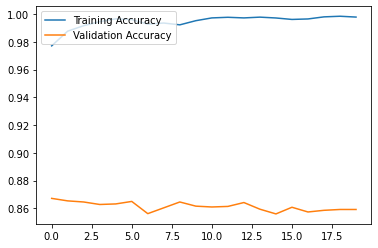

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

plt.plot(epochs, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.figure()

<Figure size 432x288 with 0 Axes>

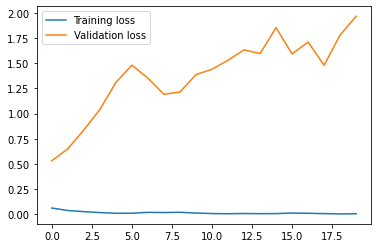

<Figure size 432x288 with 0 Axes>

In [56]:
plt.plot(epochs, history.history['loss'], label = 'Training loss')
plt.plot(epochs, history.history['val_loss'], label = 'Validation loss')
plt.legend(loc = 'upper left')
plt.figure()

We see a case of overfitting as the training accuracy is always higher

### Predict on one sample (2 Marks)

Lets take the first 2 records in the test set

In [105]:
print(y_test[0],y_test[1])

0 1


We see 1st is negatively labelled and 2nd is positively labelled. Lets go through the review once before predicting it using the model

In [113]:
print(" ".join( [reverse_index.get(i - 3, "#") for i in X_test[0]] ))

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # please give this one a miss br br # # and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite # so all you madison fans give this a miss


In [114]:
print(" ".join( [reverse_index.get(i - 3, "#") for i in X_test[1]] ))

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances # the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere # with sexual tension and psychological # it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the # moody set fits the content of the story very well in short this movie is a powerful study of lon

In [115]:
# Predicting using the model we have built
positive_test = X_test[1]
negative_test = X_test[0]
test_samples = (negative_test, positive_test)
padded_texts = sequence.pad_sequences(test_samples, maxlen=300)

# Generate predictions
predictions = model.predict(padded_texts)
print(predictions)

[[0.00560975]
 [1.        ]]


We see the positive and the negative sentiments are predicted correctly using our model.